In [1]:
import pyNN.neuron as sim  # can of course replace `nest` with `neuron`, `brian`, etc.
import matplotlib.pyplot as plt
from quantities import nA
from pyNN.random import RandomDistribution, NumpyRNG

/home/raphael/.virtualenvs/dreem/lib/python3.8/site-packages/pyNN/neuron/__init__.py:14: UserWarning: mpi4py not available
  warnings.warn("mpi4py not available")


In [2]:
refractory_period=RandomDistribution('uniform', [2.0, 3.0], rng=NumpyRNG(seed=4242))


sim.setup()
pyr_parameters= {'cm': 0.25, 'tau_m': 20.0, 'v_rest': -60, 'v_thresh': -50, 'tau_refrac': refractory_period, 'v_reset': -60, 'v_spike': -50.0, 'a': 1.0, 'b': 0.005, 'tau_w': 600, 'delta_T': 2.5,  'tau_syn_E': 5.0, 'e_rev_E': 0.0, 'tau_syn_I': 10.0, 'e_rev_I': -80 }

pyrcell = sim.Population(1, sim.EIF_cond_exp_isfa_ista(**pyr_parameters))

step_current = sim.DCSource(start=300.0, stop=700.0)
step_current.inject_into(pyrcell)

pyrcell.record('v')
print(pyrcell.celltype.recordable)
for amp in  (0.0, 0.1, 0.2,0.3,0.4,0.5):
    step_current.amplitude = amp
    sim.run(1000.0)
    sim.reset(annotations={"amplitude": amp * nA})

data = pyrcell.get_data()

sim.end()

['spikes', 'v', 'w', 'gsyn_exc', 'gsyn_inh']


/home/raphael/.virtualenvs/dreem/lib/python3.8/site-packages/pyNN/neuron/recording.py:115: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  signals = numpy.vstack((id._cell.traces[variable] for id in ids)).T


In [16]:
freq(vm,-55,start,stop)

NameError: name 'start' is not defined

In [ ]:
refractory_period=RandomDistribution('uniform', [2.0, 3.0], rng=NumpyRNG(seed=4242))


sim.setup()
pyr_parameters=sim.IF_cond_exp.default_parameters
print(pyr_parameters)
pyr_parameters={'v_rest': -70.0, 'cm': 0.5, 'tau_m': 20.0, 'tau_refrac': 0.1, 'tau_syn_E': 5.0, 
                'tau_syn_I': 5.0, 'e_rev_E': 0.0, 'e_rev_I': -70.0, 'v_thresh': -50.0, 'v_reset': -67.0,
                'i_offset': 0.0}
print(pyr_parameters)
pyrcell = sim.Population(1, sim.EIF_cond_exp_isfa_ista(**pyr_parameters))
start,stop=500.0,1000.0
step_current = sim.DCSource(start=start, stop=stop)
step_current.inject_into(pyrcell)

pyrcell.record('v')
print(pyrcell.celltype.recordable)
amp=1.0
step_current.amplitude = amp
sim.run(1000.0)
sim.reset(annotations={"amplitude": amp * nA})

data = pyrcell.get_data()

sim.end()
vm=data.segments[0].analogsignals[0]
plt.plot(vm.times,vm)
plt.xlabel('t (ms)')
plt.ylabel('Vm (muV)')
#plt.ylim((-50,-45))

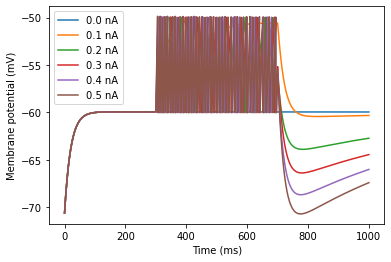

In [10]:
for segment in data.segments:
    vm = segment.analogsignals[0]
    plt.plot(vm.times, vm,  label=str(segment.annotations["amplitude"]))
plt.legend(loc="upper left")
plt.xlabel("Time (%s)" % vm.times.units._dimensionality)
plt.ylabel("Membrane potential (%s)" % vm.units._dimensionality)
plt.show()

In [11]:
import numpy as np
t=np.array(vm.times)
V=np.array(vm)

In [12]:
def datatonp(vm):
    t=np.array(vm.times)
    V=np.array(vm)
    return t,V

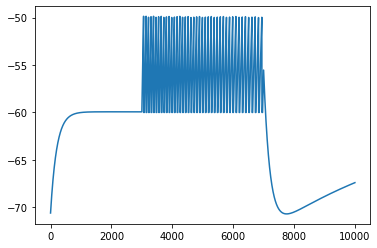

In [13]:
plt.plot(V)

In [14]:
def crossthres(x,thres):
    x2=x-thres
    dx=x2[1:]*x2[:-1]
    return np.where(dx<0)[0].size

In [15]:
def freq(vm,thres,start,stop):
    t,V=datatonp(vm)
    return crossthres(V,thres)/2/(stop-start)*1000